# Name:Roshan Kumar

#Role:Data Science Intern

# Task 2:Prediction using Unsupervised ML

#From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
#filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
#Fetching the features
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Visualisation of data

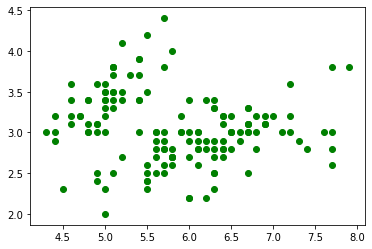

In [4]:
plt.scatter(df['sepal length (cm)'],df['sepal width (cm)'],color='green')

# Modelling of data

In [5]:
from sklearn.cluster import KMeans

In [6]:
model=KMeans(n_clusters=3)

In [7]:
result=model.fit_predict(df[['sepal length (cm)','sepal width (cm)']])
df['result']=result
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,result
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


# Getting clusters

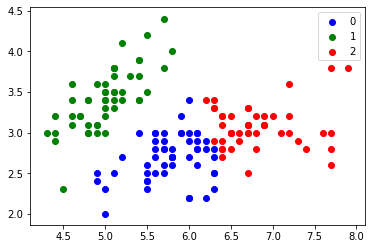

In [8]:
df0=df[df['result']==0]
df1=df[df['result']==1]
df2=df[df['result']==2]
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='blue',label=0)
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='green',label=1)
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',label=2)
plt.legend()

# cluster centers

In [9]:
model.cluster_centers_

array([[5.77358491, 2.69245283],
       [5.006     , 3.428     ],
       [6.81276596, 3.07446809]])

In [10]:
krng=range(1,10)
sse=[]

In [11]:
for k in krng:
    model=KMeans(n_clusters=k)
    model.fit(df[["sepal length (cm)","sepal width (cm)"]])
    sse.append(model.inertia_)

# sse

An error refers to how far a data point, or in this case tip is from the regression line. To get the SSE we calculate the distance for each of the data points from the regression line then square the it, then we add to the sum

In [12]:
sse

[130.47526666666667,
 58.20409278906671,
 37.05070212765958,
 28.034982153246226,
 20.99579176474281,
 17.363261904761906,
 14.81881205804,
 12.891736109171593,
 11.276336408961413]

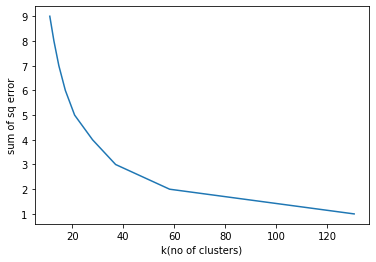

In [13]:
# graph of sum of sq error wrt no of clusters
plt.xlabel('k(no of clusters)')
plt.ylabel('sum of sq error')
plt.plot(sse,krng)